In [3]:
import numpy as np
import pandas as pd

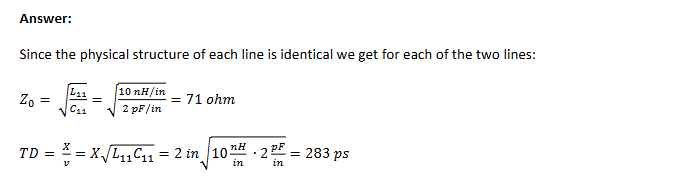

In [5]:
# Microstrip
C_matrix_1 = np.array([
    [128.5, -12.0],
    [-12.0, 128.5]
]) # pF/m

L_matrix_1 = np.array([
    [283.4, 52.2],
    [52.2, 283.4]
]) # nH/m

# Side-by-side Stripline
C_matrix_2 = np.array([
    [152.3, -21.8],
    [-21.8, 153.3]
]) # pF/m

L_matrix_2 = np.array([
    [318.5, 45.3],
    [45.3, 318.5]
]) # nH/m

# Broadside Stripline
C_matrix_3 = np.array([
    [167.5, -53.5],
    [-53.5, 167.5]
]) # pF/m

L_matrix_3 = np.array([
    [318.0, 101.4],
    [101.4, 318.0]
]) # nH/m

In [17]:
# Length of transmission line
x = 0.010 # 10 cm

# Rise time
T_rise = 500*1e-12

# Z_0
Z_0_1 = np.sqrt(C_matrix_1[0,0]*1e-12 / (L_matrix_1[0,0]*1e-9))
Z_0_2 = np.sqrt(C_matrix_2[0,0]*1e-12 / (L_matrix_3[0,0]*1e-9))
Z_0_3 = np.sqrt(C_matrix_3[0,0]*1e-12 / (L_matrix_3[0,0]*1e-9))

# Time delays
TD_1 = x*np.sqrt(C_matrix_1[0,0]*1e-12*L_matrix_1[0,0]*1e-9)
TD_2 = x*np.sqrt(C_matrix_2[0,0]*1e-12*L_matrix_2[0,0]*1e-9)
TD_3 = x*np.sqrt(C_matrix_3[0,0]*1e-12*L_matrix_3[0,0]*1e-9)

# Minimum number of segments
N_seg_min_1 = 10 * TD_1/T_rise
N_seg_min_2 = 10 * TD_2/T_rise
N_seg_min_3 = 10 * TD_3/T_rise

# Number of segments
N_seg_1 = np.ceil(N_seg_min_1) # 2 
N_seg_2 = np.ceil(N_seg_min_2) # 2
N_seg_3 = np.ceil(N_seg_min_3) # 2

# Total C and Total L
C_total_1 = TD_1/Z_0_1 
C_total_2 = TD_2/Z_0_2
C_total_3 = TD_2/Z_0_3

L_total_1 = TD_1*Z_0_1
L_total_2 = TD_2*Z_0_2
L_total_3 = TD_3*Z_0_3

# C and L for segments
C_seg_1 = C_total_1/N_seg_1
C_seg_2 = C_total_2/N_seg_2
C_seg_3 = C_total_3/N_seg_3

L_seg_1 = L_total_1/N_seg_1
L_seg_2 = L_total_2/N_seg_2
L_seg_3 = L_total_3/N_seg_3